In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import time



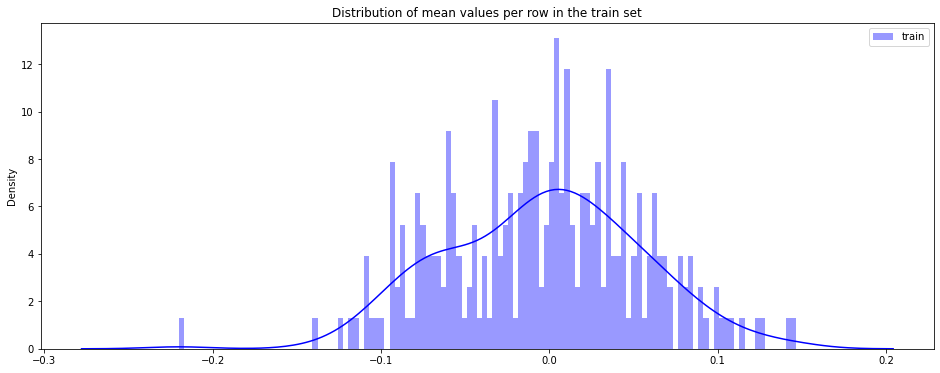

In [2]:
train = pd.read_csv("..\\data\\train.csv")


plt.figure(figsize=(16, 6))
features = train.columns.values[2:302]
plt.title("Distribution of mean values per row in the train set")
sns.distplot(train[features].mean(axis=1),
             color="blue", kde=True, bins=120, label='train')

plt.legend()
plt.show()


<Figure size 432x288 with 0 Axes>

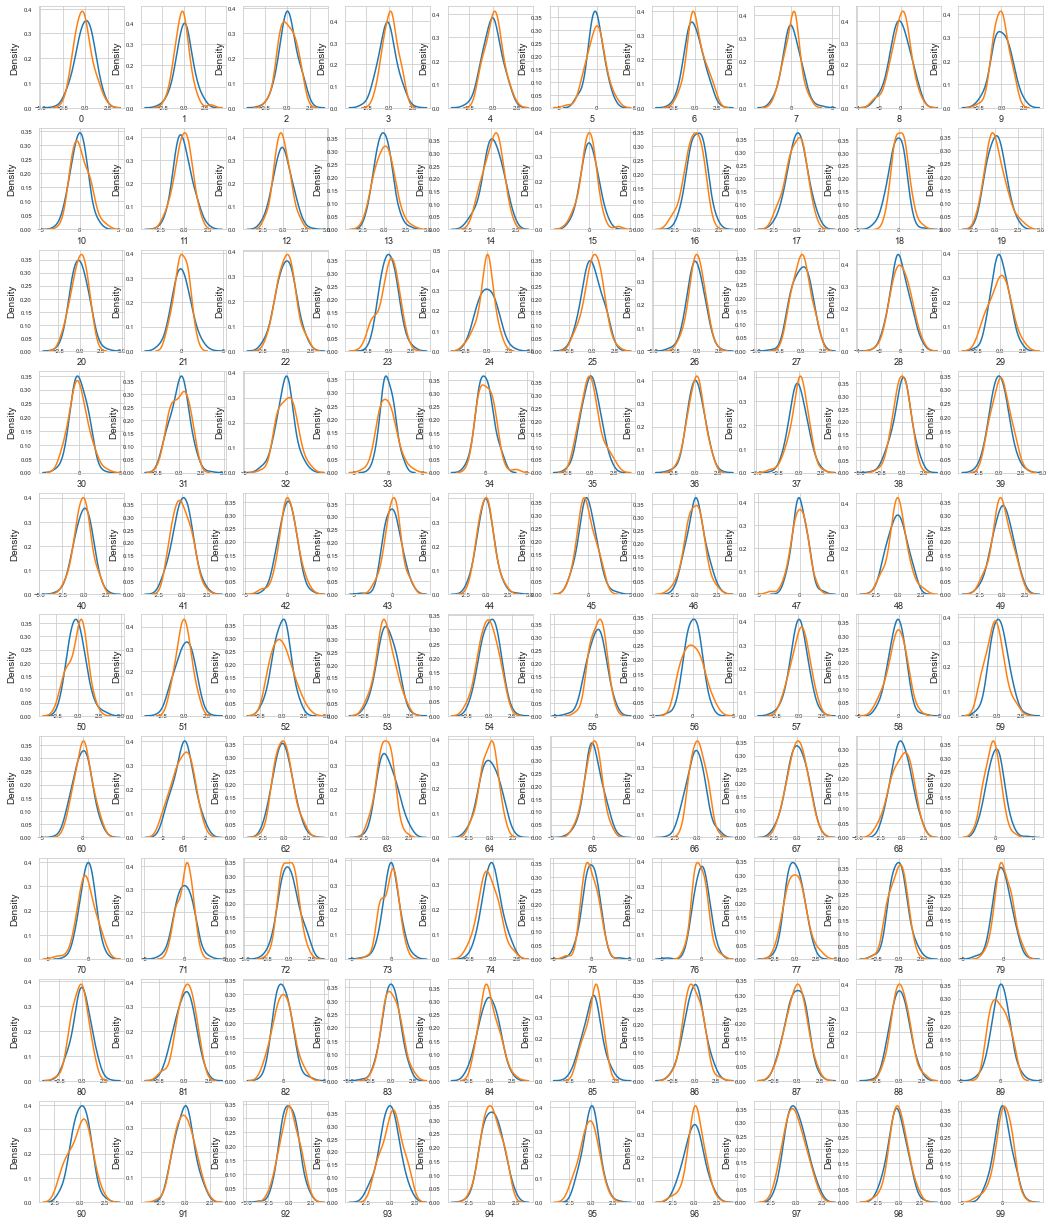

In [3]:


def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10, 10, figsize=(18, 22))

    for feature in features:
        i += 1
        plt.subplot(10, 10, i)
        sns.kdeplot(df1[feature], bw=0.5, label=label1)
        sns.kdeplot(df2[feature], bw=0.5, label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()


t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
features = train.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)


In [4]:
correlations = train[features].corr().abs(
).unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.head(10)
correlations.tail(10)


,level_0,level_1,0
9890,16,56,0.218246
9891,56,16,0.218246
9892,68,6,0.223451
9893,6,68,0.223451
9894,43,83,0.227012
9895,83,43,0.227012
9896,23,20,0.246984
9897,20,23,0.246984
9898,39,6,0.267727
9899,6,39,0.267727
